In [21]:
import plotly.graph_objects as go
from pandas import read_csv
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

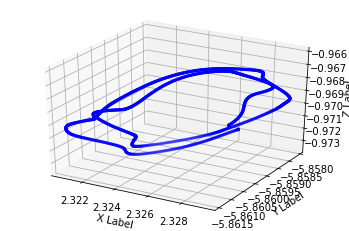

In [2]:
a = 6378137
e = 0.00699437999014

fig = plt.figure()
ax = plt.axes(projection='3d')


with open('Podatoci_od_senzori.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    x_s = []
    y_s = []
    z_s = []
    i = 0
    for row in readCSV:
        if i > 0:
            latitude = float(row[2])
            longitude = float(row[3])
            altitude = float(row[20])
            N = (a / (math.sqrt(1 - e * (math.sin(latitude)) ** 2)))
            # print (N)
            x = ((N + altitude) * math.cos(latitude) * math.cos(longitude))/1000000
            # print (x)
            y = ((N + altitude) * math.cos(latitude) * math.sin(longitude))/1000000
            # print (y)
            z = ((N * (1 - e) + altitude) * math.sin(latitude))/1000000
            # print (z)
            x_s.append(x)
            y_s.append(y)
            z_s.append(z)
            
            # print(latitude)
            # print(longitude)
            # print(altitude)
        i = i + 1
ax.scatter(x_s, y_s, z_s, c='b', marker=".")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv('Podatoci_od_senzori.csv')[['latitude', 'longitude', 'altitude(meters)']]
df['N'] = (a / (np.sqrt(1 - e * (np.sin(df['latitude'])) ** 2)))
# df['x'] = 
df.head()

,latitude,longitude,altitude(meters),N
0,40.994747,20.798435,740.611279,6.378662e+06
1,40.994747,20.798435,740.611279,6.378662e+06
2,40.994748,20.798435,740.611279,6.378662e+06
3,40.994748,20.798435,740.611279,6.378662e+06
4,40.994748,20.798434,740.611279,6.378662e+06


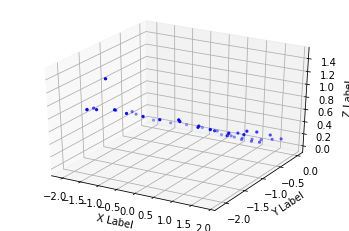

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig1 = plt.figure()
ax1 = plt.axes(projection='3d')


with open('Podatoci_od_SLAM.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    x_s1 = []
    y_s1 = []
    z_s1 = []
    i = 0
    for row in readCSV:
        if i > 0:
            x = float(row[6])
            y = float(row[7])
            z = float(row[8])
            x_s1.append(x)
            y_s1.append(y)
            z_s1.append(z)
        i = i + 1

ax1.scatter(x_s1, y_s1, z_s1, c='b', marker=".")
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')
plt.show()


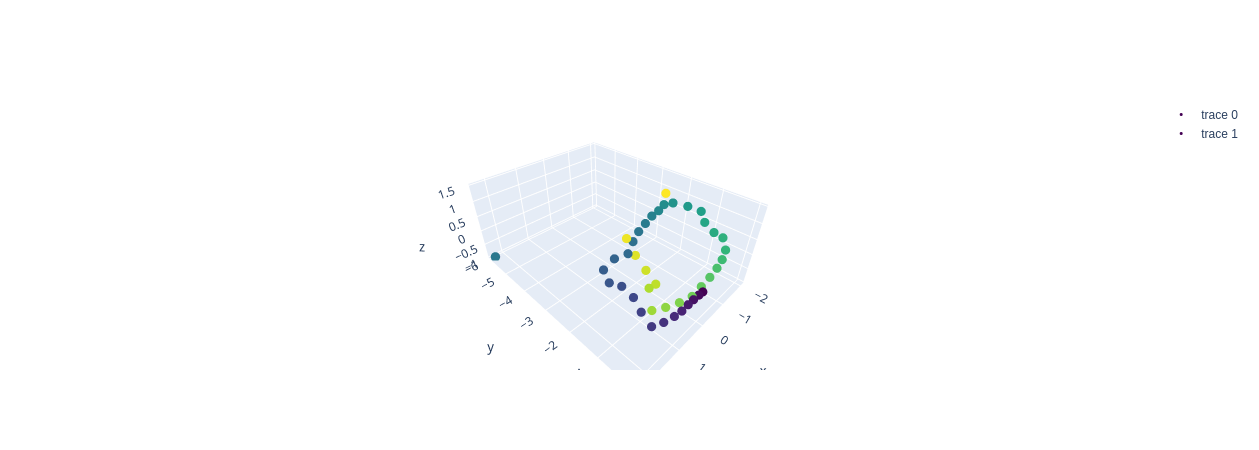

In [40]:
scatter_drone = go.Scatter3d(x=x_s, y=y_s, z=z_s, mode='markers',marker=dict(size=3, color=list(range(len(x_s))), colorscale='Viridis'))
scatter_slam = go.Scatter3d(x=x_s1, y=y_s1, z=z_s1, mode='markers',marker=dict(size=3, color=list(range(len(x_s1))), colorscale='Viridis'))
go.Figure(data=[scatter_drone, scatter_slam])

Чекор по чекор
1. Транслација
1. Скалирање
1. Ротација